## Scrap Notebook
#### By Li Zhou and Matthew Zimolzak

### Preparation

In [1]:
#import useful libraries
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Cleaning

In [2]:
#Read in necessary files

regular_2010s = pd.read_csv('../regular_season_2010s.csv')
players = pd.read_csv('../player_data.csv')
teams = pd.read_csv('../team_data.csv')

In [3]:
#We will replace the team name to standard ones that will coincide with names in the regular_2010s dataframe

teams.loc[:,('Tm')] = teams.loc[:,('Tm')].str.replace(r'^NO$','NOP')
teams.loc[:,('Tm')] = teams.loc[:,('Tm')].str.replace(r'^NY$','NYK')
teams.loc[:,('Tm')] = teams.loc[:,('Tm')].str.replace(r'^SA$','SAS')
teams.loc[:,('Tm')] = teams.loc[:,('Tm')].str.replace(r'^GS$','GSW')
teams.loc[:,('Tm')] = teams.loc[:,('Tm')].str.replace(r'^BKN$','BRK')
teams.Tm.unique()

<ipython-input-3-a12a826a3f3e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  teams.loc[:,('Tm')] = teams.loc[:,('Tm')].str.replace(r'^NO$','NOP')
<ipython-input-3-a12a826a3f3e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  teams.loc[:,('Tm')] = teams.loc[:,('Tm')].str.replace(r'^NY$','NYK')
<ipython-input-3-a12a826a3f3e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  teams.loc[:,('Tm')] = teams.loc[:,('Tm')].str.replace(r'^SA$','SAS')
<ipython-input-3-a12a826a3f3e>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  teams.loc[:,('Tm')] = teams.loc[:,('Tm')].str.replace(r'^GS$','GSW')
<ipython-input-3-a12a826a3f3e>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  teams.loc[:,('Tm')] = teams.loc[:,('Tm')].str.replace(r'^BKN$','BRK')


array(['WAS', 'CHA', 'ATL', 'MIA', 'ORL', 'NYK', 'PHI', 'BRK', 'BOS',
       'TOR', 'CHI', 'CLE', 'IND', 'DET', 'MIL', 'MIN', 'UTA', 'OKC',
       'POR', 'DEN', 'MEM', 'HOU', 'NOP', 'SAS', 'DAL', 'GSW', 'LAL',
       'LAC', 'PHO', 'SAC'], dtype=object)

In [4]:
#As we can see, there is lot of position information in this column
print(regular_2010s['Pos'].unique())

['PF' 'SG' 'C' 'SF' 'PG' 'SF-SG' 'PG-SG' 'C-PF' 'PF-SF' 'SG-PG' 'SF-PF'
 'SG-SF' 'PF-C' 'SG-PF' 'SF-C']


In [5]:
#Generally, this is the result of a player switching teams during a season and then being listed at another
#position on the new team.  To simplify, we will use their primary position, indicated before the hyphen, as 
#their position
regular_2010s.loc[:,('Pos')] = regular_2010s.loc[:,('Pos')].str.replace('SF-SG','SF')
regular_2010s.loc[:,('Pos')] = regular_2010s.loc[:,('Pos')].str.replace('PG-SG','PG')
regular_2010s.loc[:,('Pos')] = regular_2010s.loc[:,('Pos')].str.replace('C-PF','C')
regular_2010s.loc[:,('Pos')] = regular_2010s.loc[:,('Pos')].str.replace('PF-SF','PF')
regular_2010s.loc[:,('Pos')] = regular_2010s.loc[:,('Pos')].str.replace('SG-PG','SG')
regular_2010s.loc[:,('Pos')] = regular_2010s.loc[:,('Pos')].str.replace('SF-PF','SF')
regular_2010s.loc[:,('Pos')] = regular_2010s.loc[:,('Pos')].str.replace('SG-SF','SG')
regular_2010s.loc[:,('Pos')] = regular_2010s.loc[:,('Pos')].str.replace('PF-C','PF')
regular_2010s.loc[:,('Pos')] = regular_2010s.loc[:,('Pos')].str.replace('SG-PF','SG')
regular_2010s.loc[:,('Pos')] = regular_2010s.loc[:,('Pos')].str.replace('SF-C','SF')
regular_2010s['Pos'].unique()

array(['PF', 'SG', 'C', 'SF', 'PG'], dtype=object)

In [6]:
regular_2010s.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [7]:
#There are many players from European countries in the NBA with names that contain characters that are similar
#to certain English characters. We will convert each to their English counterpart.  This is necessary for 
#merging dataframes as the data in the players dataframe only contains English characters
regular_2010s.loc[:,('Player')] = regular_2010s.loc[:,('Player')].str.replace('č','c')
regular_2010s.loc[:,('Player')] = regular_2010s.loc[:,('Player')].str.replace('ć','c')
regular_2010s.loc[:,('Player')] = regular_2010s.loc[:,('Player')].str.replace('Ž','Z')
regular_2010s.loc[:,('Player')] = regular_2010s.loc[:,('Player')].str.replace('ž','z')
regular_2010s.loc[:,('Player')] = regular_2010s.loc[:,('Player')].str.replace('é','e')

In [8]:
#Some players have an asterisk appended to the end of their name – this is used to indicate that they are in 
#the Hall of Fame.  Again, this is performed for the eventual merging of dataframes 
regular_2010s.loc[:,('Player')] = regular_2010s.loc[:,('Player')].str.replace('*','')

<ipython-input-8-6278a981b841>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  regular_2010s.loc[:,('Player')] = regular_2010s.loc[:,('Player')].str.replace('*','')


In [9]:
#Next, we will convert the str into numeric data type for further analysis
for i in ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']:
    regular_2010s.loc[:,(i)] =  pd.to_numeric(regular_2010s.loc[:,(i)])

In [10]:
print('Number of teams: ' + str(len(regular_2010s['Tm'].unique())))

Number of teams: 34


In [11]:
#We now have data for 34 teams.  This is a noteworthy observation as there are only 30 teams in the NBA.  This 
#discrepancy can be attributed to the fact that some organizations changed their team name (New Jersey Nets to 
#Brooklyn Nets, New Orleans Hornets to New Orleans Pelicans, and Charlotte Bobcats to Charlotte Hornets).  
#We will replace all the old names to new names for later convenience. The team named 'TOT' will be discussed
#momentarily
regular_2010s.loc[:,('Tm')] = regular_2010s.loc[:,('Tm')].str.replace('NOH','NOP')
regular_2010s.loc[:,('Tm')] = regular_2010s.loc[:,('Tm')].str.replace('NJN','BRK')
regular_2010s.loc[:,('Tm')] = regular_2010s.loc[:,('Tm')].str.replace('CHO','CHA')
regular_2010s['Tm'].unique()

array(['GSW', 'DEN', 'MIN', 'TOT', 'DAL', 'TOR', 'OKC', 'POR', 'ORL',
       'BOS', 'MEM', 'LAC', 'NOP', 'SAS', 'NYK', 'MIA', 'WAS', 'ATL',
       'CHI', 'CHA', 'LAL', 'PHO', 'MIL', 'PHI', 'HOU', 'UTA', 'DET',
       'SAC', 'IND', 'CLE', 'BRK'], dtype=object)

In [12]:
regular_2010s

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Jeff Adrien,PF,24,GSW,23,0,8.5,1.0,2.3,0.426,...,1.0,1.5,2.5,0.4,0.2,0.2,0.4,1.2,2.5,2011
1,Arron Afflalo,SG,25,DEN,69,69,33.7,4.5,9.1,0.498,...,0.7,3.0,3.6,2.4,0.5,0.4,1.0,2.2,12.6,2011
2,Maurice Ager,SG,26,MIN,4,0,7.3,1.5,2.8,0.545,...,0.0,0.5,0.5,0.3,0.3,0.0,1.0,1.0,3.8,2011
3,Alexis Ajinça,C,22,TOT,34,2,10.0,1.7,3.9,0.444,...,0.5,1.8,2.3,0.3,0.3,0.6,0.5,2.1,4.2,2011
4,Alexis Ajinça,C,22,DAL,10,2,7.5,1.2,3.2,0.375,...,0.5,1.2,1.7,0.2,0.3,0.5,0.1,1.3,2.9,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020
6203,Cody Zeller,C,27,CHA,58,39,23.1,4.3,8.3,0.524,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020
6204,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020
6205,Ante Zizic,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020


In [13]:
#Some players have multiple records per season which indicates that they played for multiple teams in one 
#season. Generally, this means that the player was either traded during the season or released from one team 
#and then signed with another.  There is one additional record for these players that is denoted in the 'Tm' 
#(team) column by the value 'TOT' (total) – these records provide the player's staistics for the entire season 
#regardless of team.  So as to avoid double counting when performing league-wide analysis, we will be 
#removing these records and instead utilize the team splits.

regular_2010 = regular_2010s[regular_2010s['Tm'] != 'TOT']

#regular_2010 is the table without 'TOT', and regular_2010s is the table with it.

regular_2010

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Jeff Adrien,PF,24,GSW,23,0,8.5,1.0,2.3,0.426,...,1.0,1.5,2.5,0.4,0.2,0.2,0.4,1.2,2.5,2011
1,Arron Afflalo,SG,25,DEN,69,69,33.7,4.5,9.1,0.498,...,0.7,3.0,3.6,2.4,0.5,0.4,1.0,2.2,12.6,2011
2,Maurice Ager,SG,26,MIN,4,0,7.3,1.5,2.8,0.545,...,0.0,0.5,0.5,0.3,0.3,0.0,1.0,1.0,3.8,2011
4,Alexis Ajinça,C,22,DAL,10,2,7.5,1.2,3.2,0.375,...,0.5,1.2,1.7,0.2,0.3,0.5,0.1,1.3,2.9,2011
5,Alexis Ajinça,C,22,TOR,24,0,11.0,2.0,4.2,0.465,...,0.5,2.0,2.5,0.3,0.3,0.6,0.7,2.5,4.8,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020
6203,Cody Zeller,C,27,CHA,58,39,23.1,4.3,8.3,0.524,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020
6204,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020
6205,Ante Zizic,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020


#### Question 1: Are there any trends that indicate a change in playing style?

In [14]:
# Now we are going to see how playstyle changes in the last 10 years
# Let's extract some major play data from the dataframe
regular_2010s_major = regular_2010[['Year','PTS', 'TRB', 'AST', 'STL', 'BLK','3PA', "TOV", 'FTA', '2PA', 'ORB', 'DRB', 'FGA']]

# We will iterate by years and aggregate the data by mean
# We use mean instead of sum because the number of games per season varies due to a lockout in 2011 and the 
#COVID-19 pandemic.
major_mean = regular_2010s_major.groupby('Year').mean()

major_mean['Year'] = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
major_mean.set_index('Year', inplace = True)

major_mean

,PTS,TRB,AST,STL,BLK,3PA,TOV,FTA,2PA,ORB,DRB,FGA
Year,,,,,,,,,,,,
2011,7.921771,3.408303,1.735793,0.601476,0.403506,1.514576,1.140775,1.940775,5.071402,0.907565,2.504428,6.585424
2012,7.789709,3.521748,1.724660,0.649515,0.426602,1.532621,1.186990,1.841165,5.159223,0.955146,2.569903,6.690680
2013,7.636329,3.409178,1.765010,0.620841,0.404015,1.615870,1.132887,1.734990,4.921797,0.918356,2.491205,6.534799
2014,7.743066,3.394891,1.714599,0.609854,0.373358,1.712409,1.131569,1.796533,4.790328,0.866606,2.527555,6.504927
2015,7.896174,3.410087,1.815652,0.636870,0.366609,1.870609,1.135478,1.805391,4.885391,0.866783,2.549565,6.754783
2016,8.098106,3.507765,1.799432,0.638447,0.398106,1.933712,1.121402,1.850758,4.841477,0.844886,2.669129,6.772727
2017,8.271956,3.515314,1.778782,0.614022,0.389483,2.173616,1.088192,1.813100,4.621956,0.835240,2.682841,6.796310
2018,7.971074,3.299174,1.765455,0.604793,0.357025,2.237190,1.063306,1.632397,4.354711,0.756860,2.544793,6.589421
2019,8.444373,3.559003,1.865113,0.608842,0.377010,2.543569,1.040997,1.753859,4.382637,0.823633,2.740032,6.923151


In [15]:
#The first visualization!
data =major_mean.reset_index().melt('Year')
ten = alt.Chart(data).mark_line().encode(
    x = alt.X('Year', axis=alt.Axis(labelAngle=-45)), 
    y =alt.Y('value', title = 'Average Per-Game Numbers'), 
    color = alt.Color('variable', title= 'Stat')
    ).properties(
    height = 270, 
    width = 405, 
    title = "Box Score Statistics")
ten

alt.Chart(...)

In [16]:
# From the chart above we can see the majority of data haven't change significantly beside the 2PA and 3PA
# We'll extract those as well as PTS and FGA
fga = major_mean[['PTS','2PA','3PA','FGA']]
data =fga.reset_index().melt('Year')
#data = data.iloc[10:]
three = alt.Chart(data).mark_line().encode(
    x = alt.X('Year', axis=alt.Axis(labelAngle=-45)),
    y =alt.Y('value', title = ''),
    color = alt.Color('variable', title= 'Stat')
    ).properties(height = 270, width = 405, title = "Shooting Statistics")

alt.hconcat(ten, three)

alt.HConcatChart(...)

In [17]:
#As the game of basketball continues to evolve, it seems that the three point shot has become increasingly important
#over the years.  Let's take a look at this phenomenon.  First, we need to convert some of our per-game statistics
#to season totals.  To do so, we will multiply any variable of interest by the number of games played in that season.

#selecting relevant columns
threepoint = regular_2010[['Player', 'Pos', 'Age', 'Tm', 'Year', 'G', 'FG', 'FGA', '3P', '3PA', '2P', '2PA']]

#converts variables to season totals
for column in ['FG', 'FGA', '3P', '3PA', '2P', '2PA']:
    threepoint[column] = threepoint[column] * threepoint['G']

#group season totals by year
threepointbyyear = threepoint.groupby('Year').sum()

#compute proportion of shots, both attempted and made, accounted for by both three point and two point shots
threepointbyyear['3PA/FGA'] = threepointbyyear['3PA']/threepointbyyear['FGA']
threepointbyyear['2PA/FGA'] = threepointbyyear['2PA']/threepointbyyear['FGA']
threepointbyyear['3P/FG'] = threepointbyyear['3P']/threepointbyyear['FG']
threepointbyyear['2P/FG'] = threepointbyyear['2P']/threepointbyyear['FG']

threepointbyyear

<ipython-input-17-9a7c155f62e1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threepoint[column] = threepoint[column] * threepoint['G']


,Age,G,FG,FGA,3P,3PA,2P,2PA,3PA/FGA,2PA/FGA,3P/FG,2P/FG
Year,,,,,,,,,,,,
2011,14481,25153,91693.4,199786.0,15904.7,44327.9,75756.3,155489.3,0.221877,0.778279,0.173455,0.826191
2012,13717,20758,72233.3,161271.1,12702.5,36391.8,59542.5,124888.9,0.225656,0.774403,0.175854,0.824308
2013,13899,25757,91251.4,201624.3,17582.2,49039.2,73785.4,152576.7,0.243221,0.756738,0.192679,0.808595
2014,14511,25618,92815.7,204219.8,19070.6,52951.8,73733.8,151207.5,0.259288,0.740415,0.205467,0.794411
2015,15251,25981,92312.1,205572.7,19357.3,55155.7,73014.6,150441.8,0.268303,0.731818,0.209694,0.790954
2016,14109,26078,94024.1,208084.4,20984.9,59252.6,73123.5,148878.4,0.284753,0.715471,0.223186,0.777710
2017,14316,26138,96092.2,210091.9,23755.6,66405.2,72385.7,143675.4,0.316077,0.683869,0.247217,0.753294
2018,15820,26106,97461.1,211742.0,25776.5,71366.4,71672.7,140437.3,0.337044,0.663247,0.264480,0.735398
2019,16202,26101,101071.9,219480.0,27922.1,78728.6,73122.5,140799.8,0.358705,0.641515,0.276260,0.723470


In [18]:
#We see that both the proportion of all three point shots attempted relative to all field goals attempted and
#the proportion of all three point shots made releative to all field goals made increase year after year.  The
#belief that an increasing emphasis is being placed on the three point shot appears to be reflected in the data.
#Let's take a look at how the three point shots attempted is distributed by position.

agg = pd.DataFrame(index = ['C', 'PF', 'PG', 'SF', 'SG'])
years = [x for x in range(2011,2021,1)]

for year in years:
    yearly = threepoint[threepoint['Year'] == year].groupby('Pos').sum()
    agg[str(year)] = yearly['3PA'] / sum(yearly['3PA'])

agg = agg.T
agg=agg.reset_index()
agg = agg.rename(columns = {'index':'Year'})
agg = agg.set_index('Year')
data =agg.reset_index().melt('Year')

In [19]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('value', stack="normalize", title = 'Proportion of 3PA'),
    y='Year',
    color= alt.Color('variable', title = 'Position')
).properties(width = 600, height = 400)

alt.Chart(...)

In [20]:
tpa_mean = [] #tpa = three point shots attempted
for i in range(2011,2021):
    y_mean = []
    for j in ['PG','SG','SF','PF','C']:
        mean = regular_2010['3PA'].where((regular_2010['Year']== i) & (regular_2010['Pos'] == j)).mean()
        y_mean.append(mean)
    tpa_mean.append(y_mean)
tpa_mean
# Generate a dataframe for the data we get
tpa_df = pd.DataFrame(data = tpa_mean)
# Make it nicer
tpa_df.columns = ['PG','SG','SF','PF','C']
tpa_df['Year'] = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
tpa_df =tpa_df.set_index('Year', drop=True)

#This dataframe provides the average three point shots attempted per player, per game for each position over
#the course of the decade
tpa_df

,PG,SG,SF,PF,C
Year,,,,,
2011,2.208824,2.403571,2.114815,0.866000,0.095000
2012,2.115385,2.662245,2.164000,0.762745,0.127928
2013,2.327835,2.486916,2.255140,0.915741,0.125000
2014,2.618627,2.306667,2.183478,1.043119,0.291176
2015,2.565289,2.782946,2.379048,1.088889,0.204255
2016,2.316071,2.919811,2.688776,1.386842,0.311224
2017,2.622430,3.053913,2.736082,1.819658,0.641509
2018,2.487402,3.103448,2.426214,2.235965,0.713793
2019,2.769355,3.399359,2.905714,2.397656,0.884404


In [21]:
# Let's plot the data in line chart to have a look
data =tpa_df.reset_index().melt('Year')
line = alt.Chart(data).mark_line().encode(x = alt.X('Year', axis=alt.Axis(labelAngle=-45)), y =alt.Y('value', title = 'Average Attempts'), color = alt.Color('variable', legend = None)
    ).properties(height = 283.5, width = 425.25, title = "Average Attempts Since 2010")

In [22]:
# The 3 points attempts by C and PF increased a lot!
# Let's see how much have they changed
# We will use the data of 2020 substract the data of 2011 and divided by the data of 2011
sub = []
for j in ['PG','SG','SF','PF','C']:
    sub.append(round(((tpa_df[j].iloc[9] - tpa_df[j].iloc[0])/tpa_df[j].iloc[0])*100,2))
sub =pd.DataFrame(sub,['PG','SG','SF','PF','C'])
sub = sub.reset_index()
sub.columns =['Pos', 'Increasing Percentage']
sub

,Pos,Increasing Percentage
0,PG,52.93
1,SG,43.51
2,SF,41.41
3,PF,189.95
4,C,1252.29


In [23]:
# We will plot it with a bar chart which gives us a more intuitive view
bar = alt.Chart(sub).mark_bar(size = 40).encode(y = alt.Y('Pos',axis=alt.Axis(labelAngle=0),title = None), 
                                          x = alt.X('Increasing Percentage',axis=alt.Axis(labelAngle=-45), sort=alt.EncodingSortField(field="Increasing Percentage", order='ascending'), title = 'Percent Increase'), 
                                          color = alt.Color('Pos', title= 'Position')).properties(
    width = 425.25,
    height = 283.5,
    title = 'Percent Change in 3PA (2010-2020)')

text = bar.mark_text(
    align='center',
    baseline='middle',
    dx=20 # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Increasing Percentage:Q'
)

barchart = bar + text

(line | barchart).configure_axis(
    grid=False
).configure_view(
    strokeOpacity=0
).properties(title = {'text':['Three point shots are up'],'subtitle':["For centers, 3PA has increased by over 1,200%",''],'subtitleFontSize': 16,'fontSize': 20,'anchor':'start'})

alt.HConcatChart(...)

### We may conclude the first finding we have from our analysis:  "Big Men are more likely to throw 3 points than ever!"


### Question 2: Who are the stars of the NBA past, present, and future?
Then we are going to have our second analysis
In this section, we will look at Appproximate Value and Trade Value
We are intereted in to find who is the most valued player and who got the most potential
Approximate Value is the metric which is an estimate of a player’s value, making no fine distinctions, but, rather, distinguishing easily between very good seasons, average seasons, and poor seasons.

There are two steps to calculate approximate value:

Credits Formula = (Points)+(Rebounds)+(Assists)+(Steal)+(Blocks)-(Field Goals Missed)-(Free Throws Missed)-(Turnovers)
AV Formula = (Credits^(3/4) )/21

Trade Value is the estimate using a player’s age and his approximate value to determine how much value a player has left in his career. Invented by Bill James.

Trade Value Formula=[(Approximate Value- 27-0.75Age)**2(27-0.75Age +1)Approximate Value]/190+(Approximate Value)2/13

In [24]:
# We will add 2 columns as 'AV' and "TV"
regular_2010s.loc[:,('AV')] = (((regular_2010s.PTS)+(regular_2010s.TRB)+(regular_2010s.AST)+(regular_2010s.STL)
                                +(regular_2010s.BLK)-(regular_2010s.FGA-regular_2010s.FG)-
                                (regular_2010s.FTA-regular_2010s.FT)-(regular_2010s.TOV))**(3/4))/21

regular_2010s.loc[:,('TV')] = ((regular_2010s.AV- 27-0.75*regular_2010s.Age)**2*(27-0.75*regular_2010s.Age +1)
                               *regular_2010s.AV)/190+(regular_2010s.AV)*2/13
regular_2010s

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,AV,TV
0,Jeff Adrien,PF,24,GSW,23,0,8.5,1.0,2.3,0.426,...,2.5,0.4,0.2,0.2,0.4,1.2,2.5,2011,0.129604,13.753546
1,Arron Afflalo,SG,25,DEN,69,69,33.7,4.5,9.1,0.498,...,3.6,2.4,0.5,0.4,1.0,2.2,12.6,2011,0.335375,33.726830
2,Maurice Ager,SG,26,MIN,4,0,7.3,1.5,2.8,0.545,...,0.5,0.3,0.3,0.0,1.0,1.0,3.8,2011,0.097501,9.407015
3,Alexis Ajinça,C,22,TOT,34,2,10.0,1.7,3.9,0.444,...,2.3,0.3,0.3,0.6,0.5,2.1,4.2,2011,0.156830,17.856674
4,Alexis Ajinça,C,22,DAL,10,2,7.5,1.2,3.2,0.375,...,1.7,0.2,0.3,0.5,0.1,1.3,2.9,2011,0.119231,13.599245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020,0.557753,64.101984
6203,Cody Zeller,C,27,CHA,58,39,23.1,4.3,8.3,0.524,...,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020,0.353840,31.796078
6204,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020,0.064543,4.575924
6205,Ante Zizic,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020,0.182555,20.085952


In [25]:
#Approximate Value Rank Top 20
regular_2010s.sort_values('AV', ascending=False, inplace = True)
regular_2010s[0:10]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,AV,TV
4867,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,...,12.5,5.9,1.3,1.5,3.7,3.2,27.7,2019,0.689623,71.369904
5568,Giannis Antetokounmpo,PF,25,MIL,63,63,30.4,10.9,19.7,0.553,...,13.6,5.6,1.0,1.0,3.7,3.1,29.5,2020,0.677868,67.146658
4147,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,...,10.7,10.4,1.6,0.4,5.4,2.3,31.6,2017,0.669007,55.319078
5009,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,0.517,...,12.0,3.9,1.6,2.4,2.0,2.4,25.9,2019,0.661592,65.581755
5115,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019,0.654150,49.876553
4332,Anthony Davis,PF,24,NOP,75,75,36.4,10.4,19.5,0.534,...,11.1,2.3,1.5,2.6,2.2,2.1,28.1,2018,0.654150,67.807080
4487,LeBron James,PF,33,CLE,82,82,36.9,10.5,19.3,0.542,...,8.6,9.1,1.4,0.9,4.2,1.7,27.5,2018,0.651166,29.183451
5813,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,...,6.6,7.5,1.8,0.9,4.5,3.3,34.3,2020,0.649672,44.978412
5048,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,0.484,...,13.6,3.7,0.7,1.9,3.5,3.3,27.5,2019,0.646680,67.055278
3799,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,0.440,...,8.1,11.2,1.5,0.5,5.7,2.7,29.1,2017,0.646680,57.388494


In [26]:
# Create a smaller dataframe which only focus on Approximate Value
regular_2010s_av = regular_2010s[['Player', 'Tm', 'Year','AV', 'G', 'Age']]
# Merge the dataframe with another one with color info
regular_2010s_av = regular_2010s_av.merge(teams, how = 'left', on = 'Tm')
regular_2010s_av = regular_2010s_av[['Player', 'PrimaryColor','SecondaryColor', 'Year', 'AV','Tm', 'G', 'Age']]
regular_2010s_av

,Player,PrimaryColor,SecondaryColor,Year,AV,Tm,G,Age
0,Giannis Antetokounmpo,00471B,EEE1C6,2019,0.689623,MIL,72,24
1,Giannis Antetokounmpo,00471B,EEE1C6,2020,0.677868,MIL,63,25
2,Russell Westbrook,007AC1,EF3B24,2017,0.669007,OKC,81,28
3,Anthony Davis,002B5C,B4975A,2019,0.661592,NOP,56,25
4,James Harden,CE1141,000000,2019,0.654150,HOU,78,29
...,...,...,...,...,...,...,...,...
6202,Jared Harper,1D1160,E56020,2020,NaN,PHO,3,22
6203,William Howard,CE1141,000000,2020,NaN,HOU,2,26
6204,Stanton Kidd,002B5C,F9A01B,2020,NaN,UTA,4,27
6205,Malik Newman,6F263D,FDB81C,2020,NaN,CLE,1,22


In [27]:
# We will see who are the top 10s in the past 10 years
lst = []
for i in range(2011,2021):
    data = regular_2010s_av[regular_2010s_av['Year'] == i]
    data = data[data['G'] >= 0.5*max(data['G'])]
    data = data.sort_values('AV', ascending = False)
    if i == 2020:
        #We are specifically eliminating Andre Drummond from this 
        data = data[data['Player'] != 'Andre Drummond']
    a = data['Player'][:10].tolist()
    lst.append(a)

top10av = pd.DataFrame(data = lst)
top10av.columns = ['1st', '2nd', '3rd' ,'4th', '5th', '6th', '7th', '8th', '9th', '10th']
top10av['Year'] = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
top10av =top10av.set_index('Year', drop=True)
top10av

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
Year,,,,,,,,,,
2011,LeBron James,Dwight Howard,Kevin Love,Blake Griffin,Pau Gasol,Dwyane Wade,Kevin Durant,Amar'e Stoudemire,Zach Randolph,Deron Williams
2012,LeBron James,Kevin Love,Kevin Durant,Dwight Howard,Chris Paul,Andrew Bynum,Blake Griffin,Pau Gasol,Al Jefferson,LaMarcus Aldridge
2013,LeBron James,Kevin Durant,Kobe Bryant,Tim Duncan,James Harden,Chris Paul,David Lee,Al Horford,Carmelo Anthony,LaMarcus Aldridge
2014,Kevin Durant,Kevin Love,LeBron James,Anthony Davis,Blake Griffin,Chris Paul,DeMarcus Cousins,Carmelo Anthony,Stephen Curry,LaMarcus Aldridge
2015,Anthony Davis,Russell Westbrook,DeMarcus Cousins,James Harden,Stephen Curry,Chris Paul,LeBron James,Pau Gasol,LaMarcus Aldridge,DeAndre Jordan
2016,Stephen Curry,Kevin Durant,Russell Westbrook,James Harden,LeBron James,Anthony Davis,DeMarcus Cousins,Chris Paul,Draymond Green,Kawhi Leonard
2017,Russell Westbrook,James Harden,Anthony Davis,LeBron James,Karl-Anthony Towns,Kevin Durant,DeMarcus Cousins,DeMarcus Cousins,Giannis Antetokounmpo,Jimmy Butler
2018,Anthony Davis,LeBron James,Giannis Antetokounmpo,James Harden,DeMarcus Cousins,Russell Westbrook,Karl-Anthony Towns,Kevin Durant,Stephen Curry,Andre Drummond
2019,Giannis Antetokounmpo,Anthony Davis,James Harden,Joel Embiid,Karl-Anthony Towns,LeBron James,Nikola Jokic,Russell Westbrook,Nikola Vucevic,Kevin Durant


In [28]:
av_list = top10av.reset_index().melt('Year')
av_list.rename(columns = {'variable':'Rank', 'value':'Player'}, inplace = True)
av_list['Rank'] = av_list['Rank'].str.strip('sthndr') #removes 'st' from 1st, 'nd' from 2nd, and so on
av_list['Rank'] = pd.to_numeric(av_list['Rank'])

#creates the top 10 players of the decade by assigning points for final AV ranking for each season – 1st gets
#10 points, 2nd gets 9 points, 3rd gets 8 points and so on
decade_top10 = pd.DataFrame(columns = ['Player', 'Points', 'Appearances'])
for player in av_list['Player'].unique():
    player_df = av_list[av_list['Player'] == player]
    player_df['Points'] = 11 - player_df['Rank']
    row = []
    row.append(player)
    row.append(sum(player_df['Points']))
    row.append(len(player_df))
    series = pd.Series(row, index = decade_top10.columns)
    decade_top10 = decade_top10.append(series, ignore_index = True)

decade_top10.sort_values('Points', ascending = False).head(10).style.hide_index()

<ipython-input-28-a71de346d551>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Points'] = 11 - player_df['Rank']


Player,Points,Appearances
LeBron James,75,10
Anthony Davis,56,7
James Harden,53,7
Kevin Durant,49,8
Russell Westbrook,35,5
Giannis Antetokounmpo,30,4
DeMarcus Cousins,29,6
Kevin Love,26,3
Chris Paul,24,5
Stephen Curry,20,4


In [29]:
#10 best single season performances of the decade
regular_2010s_av[['Player', 'Year', 'AV']].head(10).style.hide_index()

Player,Year,AV
Giannis Antetokounmpo,2019,0.689623
Giannis Antetokounmpo,2020,0.677868
Russell Westbrook,2017,0.669007
Anthony Davis,2019,0.661592
James Harden,2019,0.654150
Anthony Davis,2018,0.654150
LeBron James,2018,0.651166
James Harden,2020,0.649672
Joel Embiid,2019,0.646680
James Harden,2017,0.646680


In [30]:
# Let's visualize the top 10 in 2020 with a bar chart
# Add '#' sign to make the color can be recognized
regular_20_av = regular_2010s_av[regular_2010s_av['Year'] == 2020]
regular_20_av = regular_20_av[regular_20_av['G'] >= 0.5*max(regular_20_av['G'])]
regular_20_tav = regular_20_av[regular_20_av['Tm'] != 'DET']
regular_20_tav = regular_20_tav[:10]
regular_20_tav['PrimaryColor'] = '#' + regular_20_tav['PrimaryColor']
regular_20_tav['SecondaryColor'] = '#' + regular_20_tav['SecondaryColor']
regular_20_tav
#np.mean(regular_20_tav['Age'])

,Player,PrimaryColor,SecondaryColor,Year,AV,Tm,G,Age
1,Giannis Antetokounmpo,#00471B,#EEE1C6,2020,0.677868,MIL,63,25
7,James Harden,#CE1141,#000000,2020,0.649672,HOU,68,30
16,Luka Doncic,#0064B1,#00285E,2020,0.619543,DAL,61,20
28,Anthony Davis,#552583,#FDB927,2020,0.607355,LAL,62,26
31,LeBron James,#552583,#FDB927,2020,0.602764,LAL,67,35
33,Damian Lillard,#E03A3E,#000000,2020,0.596624,POR,66,29
52,Nikola Jokic,#0E2240,#FEC524,2020,0.573406,DEN,73,24
56,Kawhi Leonard,#C8102E,#1D428A,2020,0.570287,LAC,57,28
65,Joel Embiid,#006BB6,#ED174C,2020,0.562464,PHI,51,25
66,Domantas Sabonis,#002D62,#FDBB30,2020,0.562464,IND,62,23


In [31]:
# Make the bar chart with the player's team primary color
chart_av = alt.Chart(regular_20_tav).mark_bar(size = 20).encode(
    y=alt.Y('Player', sort = ['AV'],  title = 'Player'), 
    x = alt.X('AV', title = None), 
    color=alt.Color('PrimaryColor:N', scale = None)  
).properties(
    width = 200,
    height = 400,
    title = "Approximate Value Rank Top 10")

av_text = chart_av.mark_text(
    align='center',
    baseline='middle',
    dx = 15 # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Tm'
)


chart_av + av_text

alt.LayerChart(...)

In [32]:
# Create a smaller dataframe which only focus on Trade Value
regular_2010s_tv = regular_2010s[['Player', 'Tm', 'Year','TV', 'Age']]
# Merge the dataframe with another one with color info
regular_2010s_tv = regular_2010s_tv.merge(teams, how = 'left', on = 'Tm')
regular_2010s_tv = regular_2010s_tv[['Player', 'PrimaryColor','SecondaryColor', 'Year', 'TV','Tm', 'Age']]
regular_2010s_tv

,Player,PrimaryColor,SecondaryColor,Year,TV,Tm,Age
0,Giannis Antetokounmpo,00471B,EEE1C6,2019,71.369904,MIL,24
1,Giannis Antetokounmpo,00471B,EEE1C6,2020,67.146658,MIL,25
2,Russell Westbrook,007AC1,EF3B24,2017,55.319078,OKC,28
3,Anthony Davis,002B5C,B4975A,2019,65.581755,NOP,25
4,James Harden,CE1141,000000,2019,49.876553,HOU,29
...,...,...,...,...,...,...,...
6202,Jared Harper,1D1160,E56020,2020,NaN,PHO,22
6203,William Howard,CE1141,000000,2020,NaN,HOU,26
6204,Stanton Kidd,002B5C,F9A01B,2020,NaN,UTA,27
6205,Malik Newman,6F263D,FDB81C,2020,NaN,CLE,22


In [33]:
# We will see who are the top 10s in the past 10 years
lst = []
for i in range(2011,2021):
    data = regular_2010s_tv[regular_2010s_av['Year'] == i]
    data = data.sort_values('TV', ascending = False)
    a = data['Player'][:10].tolist()
    lst.append(a)

top10tv = pd.DataFrame(data = lst)
top10tv.columns = ['1st', '2nd', '3rd' ,'4th', '5th', '6th', '7th', '8th', '9th', '10th']
top10tv['Year'] = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
top10tv =top10tv.set_index('Year', drop=True)
top10tv

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th
Year,,,,,,,,,,
2011,Kevin Love,Blake Griffin,Kevin Durant,Dwight Howard,Derrick Rose,LeBron James,Russell Westbrook,Al Horford,Chris Paul,LaMarcus Aldridge
2012,Kevin Love,Kevin Durant,Blake Griffin,Andrew Bynum,LeBron James,DeMarcus Cousins,Greg Monroe,Dwight Howard,Kyrie Irving,Russell Westbrook
2013,Kevin Durant,James Harden,Kyrie Irving,LeBron James,Nikola Vucevic,Tobias Harris,Russell Westbrook,Blake Griffin,Stephen Curry,Anthony Davis
2014,Anthony Davis,Kevin Durant,Kevin Love,DeMarcus Cousins,Andre Drummond,Blake Griffin,James Harden,Stephen Curry,Paul George,John Wall
2015,Anthony Davis,DeMarcus Cousins,James Harden,Enes Kanter,Russell Westbrook,Andre Drummond,Nikola Vucevic,Stephen Curry,Kevin Durant,Blake Griffin
2016,Anthony Davis,Karl-Anthony Towns,DeMarcus Cousins,Stephen Curry,James Harden,Giannis Antetokounmpo,Kevin Durant,Andre Drummond,Kawhi Leonard,Russell Westbrook
2017,Karl-Anthony Towns,Anthony Davis,Giannis Antetokounmpo,Nikola Jokic,James Harden,DeMarcus Cousins,DeMarcus Cousins,Russell Westbrook,Rudy Gobert,DeMarcus Cousins
2018,Anthony Davis,Giannis Antetokounmpo,Karl-Anthony Towns,Nikola Jokic,Ben Simmons,Andre Drummond,Joel Embiid,DeMarcus Cousins,Clint Capela,Devin Booker
2019,Giannis Antetokounmpo,Joel Embiid,Karl-Anthony Towns,Anthony Davis,Nikola Jokic,Ben Simmons,Deandre Ayton,John Collins,Clint Capela,Luka Doncic


In [34]:
# Let's visualize the top 10 in 2020 with a bar chart
# Add '#' sign to make the color can be recognized
regular_20_tv = regular_2010s_tv[regular_2010s_tv['Year'] == 2020]
regular_20_tv.sort_values('TV', ascending = False, inplace = True)
regular_20_ttv = regular_20_tv[:10]
regular_20_ttv['PrimaryColor'] = '#' + regular_20_ttv['PrimaryColor']
regular_20_ttv['SecondaryColor'] = '#' + regular_20_ttv['SecondaryColor']
regular_20_ttv
#np.mean(regular_20_ttv['Age'])

<ipython-input-34-0c9ca50aee55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_20_tv.sort_values('TV', ascending = False, inplace = True)
<ipython-input-34-0c9ca50aee55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_20_ttv['PrimaryColor'] = '#' + regular_20_ttv['PrimaryColor']
<ipython-input-34-0c9ca50aee55>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,Player,PrimaryColor,SecondaryColor,Year,TV,Tm,Age
16,Luka Doncic,#0064B1,#00285E,2020,72.681184,DAL,20
1,Giannis Antetokounmpo,#00471B,#EEE1C6,2020,67.146658,MIL,25
17,Karl-Anthony Towns,#0C2340,#78BE20,2020,64.166633,MIN,24
72,Trae Young,#C8102E,#FDB927,2020,64.101984,ATL,21
68,John Collins,#C8102E,#FDB927,2020,62.680191,ATL,22
66,Domantas Sabonis,#002D62,#FDBB30,2020,60.825147,IND,23
123,Deandre Ayton,#1D1160,#E56020,2020,60.362946,PHO,21
52,Nikola Jokic,#0E2240,#FEC524,2020,59.653738,DEN,24
126,Bam Adebayo,#000000,#98002E,2020,58.349331,MIA,22
28,Anthony Davis,#552583,#FDB927,2020,57.319572,LAL,26


In [35]:
# Make the bar chart with the player's team primary color
chart_tv = alt.Chart(regular_20_ttv).mark_bar(size = 20).encode(
    y=alt.Y('Player', sort = ['TV'],  title = None), 
    x = alt.X('TV', title = None), 
    color=alt.Color('PrimaryColor:N', scale = None)  
).properties(
    width = 200,
    height = 400,
    title = "Trade Value Rank Top 10")

tv_text = chart_tv.mark_text(
    align='center',
    baseline='middle',
    dx = 15 # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Tm'
)


chart_tv + tv_text

alt.LayerChart(...)

In [36]:
((chart_av + av_text) | (chart_tv + tv_text)).configure_axis(
    grid=False
).configure_view(
    strokeOpacity=0
).properties(title = {'text':['The Now and Future of the NBA'],
                      'subtitle':["Approximate Value reflects more on a player's current value",
                                  "while Trade Value reflects more on a player's future value",''],
                      'subtitleFontSize': 16,'fontSize': 20,'anchor':'start'})

alt.HConcatChart(...)

In [37]:
# Now let's see the values' correlation with salaries.
# First, we' will merge the data with another one with salary data
# Season of 2020 will be our focus
regular_season_20 = regular_2010s[regular_2010s['Year'] == 2020]
regular_season_20 = regular_season_20.merge(players, how = 'left', on = 'Player')
regular_season_20.columns.str.strip()
regular_season_20 = regular_season_20.drop(columns=['Position','PositionCategory'])
regular_season_20 = regular_season_20.sort_values('Salary', ascending = False)
regular_season_20[:10]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV,PF,PTS,Year,AV,TV,Height,Weight,Salary,Experience
40,Stephen Curry,PG,31,GSW,5,5,27.8,6.6,16.4,0.402,...,3.2,2.2,20.8,2020,0.467138,29.014958,75.0,185.0,43006362.0,11.0
18,Russell Westbrook,PG,31,HOU,57,57,35.9,10.6,22.5,0.472,...,4.5,3.5,27.2,2020,0.549871,34.040564,75.0,200.0,41358814.0,12.0
35,Chris Paul,PG,34,OKC,70,70,31.5,6.2,12.7,0.489,...,2.3,2.3,17.6,2020,0.482074,17.237681,73.0,175.0,41358814.0,15.0
1,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,0.444,...,4.5,3.3,34.3,2020,0.649672,44.978412,77.0,220.0,41254920.0,11.0
5,LeBron James,PG,35,LAL,67,67,34.6,9.6,19.4,0.493,...,3.9,1.8,25.3,2020,0.602764,15.480756,81.0,250.0,39219565.0,17.0
199,Blake Griffin,PF,30,DET,18,18,28.4,4.9,13.9,0.352,...,2.2,1.5,15.5,2020,0.305099,21.421154,81.0,250.0,36810996.0,10.0
43,Paul George,SF,29,LAC,48,48,29.6,7.1,16.3,0.439,...,2.6,2.4,21.5,2020,0.460449,35.390284,80.0,220.0,35450412.0,10.0
161,Mike Conley,PG,32,UTA,47,41,29.0,4.9,12.1,0.409,...,2.0,2.2,14.4,2020,0.327895,17.775128,73.0,175.0,34502130.0,13.0
61,Kemba Walker,PG,29,BOS,56,56,31.1,6.8,15.9,0.425,...,2.1,1.6,20.4,2020,0.428215,32.956666,72.0,184.0,34379100.0,9.0
9,Kawhi Leonard,SF,28,LAC,57,57,32.4,9.3,19.9,0.470,...,2.6,2.0,27.1,2020,0.570287,47.352671,79.0,225.0,34379100.0,9.0


### Question 3: Which players are the most overvalued/undervalued? 

In [38]:
# Let's see the scatter plot of Approximate Value and Salary
# We can see from the table above, PG dominant the top 10 salary rank which occupied 6 of them.
base = alt.Chart(regular_season_20).mark_circle(size = 100).encode(
    x = alt.X('AV',title = "Approximate Value"), 
    y = alt.Y('Salary',title = "Salary",scale=alt.Scale(domain=[0, 45000000])), 
    color = alt.Color('Pos',title = 'Position')).properties(
    title = 'Approximate Value & Salary', 
    width = 600, 
    height = 600)

In [39]:
#The pearson r indicates how related the relation is between approximate value and salary
regular_season_20_cor = regular_season_20.dropna()
np.corrcoef(regular_season_20_cor['Salary'],regular_season_20_cor['AV'])[0][1]

0.712497390264455

In [40]:
#Fit a linear regression line on the graph
X = np.array(regular_season_20_cor['AV']).reshape(-1,1)
y = np.array(regular_season_20_cor['Salary']).reshape(-1,1)
lr = LinearRegression().fit(X,y)
salary_pred = pd.DataFrame({'Approximate Value': np.linspace(regular_season_20_cor['AV'].min(),
                                                             regular_season_20_cor['AV'].max(), 100)})
pred = lr.predict(salary_pred).reshape(100)

In [41]:
pred_df = pd.DataFrame(data = {'AV':salary_pred['Approximate Value'], 'Salary':pred})
pred_df = pred_df[pred_df['Salary'] > 0]

In [42]:
line = alt.Chart(pred_df).mark_line(color = 'red', opacity = 0.5).encode(
    x = 'AV',
    y = alt.Y('Salary',scale=alt.Scale(domain=[0, 45000000])))

In [43]:
df_point = regular_season_20[regular_season_20['Pos'] == 'PG']
df_point = df_point[:6]

In [44]:
point = alt.Chart(df_point).mark_circle(size = 20, color = 'black').encode(
    x = alt.X('AV'), 
    y = alt.Y('Salary'))

In [45]:
annotations = [[0.15, 42000000, '6 of the top 10 \nsalary players are PG']]
c_df = pd.DataFrame(annotations, columns=['AV','salary','note'])
arr = pd.DataFrame({'x':[0.28, 0.4], 
                   'y':[41000000, 40000000], 
                   'class':['A','A']})

In [46]:
annotation = alt.Chart(c_df).mark_text(align = 'center', baseline = 'middle', dx=7, lineBreak = '\n', style ='bond', fontSize=20).encode(x='AV', y='salary', text='note')

a = alt.Chart(arr).mark_line(color = 'black').encode(
    x='x',
    y='y:Q',
    detail='class:N'
)

In [47]:
players = pd.DataFrame({'AV': [0.305099, 0.327895, 0.556180, 0.677868, 0.619543, 0.467138, 0.649672, 0.602764],
                       'Salary': [36810996.0, 34502130.0, 1620564.0, 27528090.0, 8049360.0, 43006362.0, 
                                 41254920.0, 39219565.0],
                       'player': ['Blake Griffin', 'Mike Conley', 'Hassan Whiteside', 'Giannis Antetokounmpo',
                                 'Luka Doncic', 'Stephen Curry', 'James Harden', 'LeBron James']}
                      )
b = alt.Chart(players).mark_text(dy = -10).encode(
    x = 'AV',
    y = 'Salary',
    text = 'player')

In [48]:
# txt = alt.Chart(pred_df).mark_text().encode()
(base + line + point + annotation + a + b)

alt.LayerChart(...)

In [49]:
# Let's see Trade Value instead of approximate value
base = alt.Chart(regular_season_20).mark_circle(size= 100).encode(
    x = alt.X('TV',title = "Trade Value"), 
    y = alt.Y('Salary',title = "Salary"), 
    color = alt.Color('Pos',title = 'Position')).properties(
    title = 'Trade Value & Salary', 
    width = 600, 
    height = 600)

#Fit a linear regression line on the graph
X = np.array(regular_season_20_cor['TV']).reshape(-1,1)
y = np.array(regular_season_20_cor['Salary']).reshape(-1,1)
lr = LinearRegression().fit(X,y)
salary_pred = pd.DataFrame({'Trade Value': np.linspace(regular_season_20_cor['TV'].min(), regular_season_20_cor['TV'].max(), 100)})
pred = lr.predict(salary_pred).reshape(100)
pred_df = pd.DataFrame(data = {'TV':salary_pred['Trade Value'], 'Salary':pred})
pred_df = pred_df[pred_df['Salary'] > 0]

line = alt.Chart(pred_df).mark_line(color = 'red', opacity = 0.5).encode(x = 'TV', y = 'Salary')

base + line

alt.LayerChart(...)

In [50]:
# The Pearson R here is much lower than the other above.
# Which means salary is more reflects on their approximate value(current value).
regular_season_20_cor = regular_season_20.dropna()
np.corrcoef(regular_season_20_cor['Salary'],regular_season_20_cor['TV'])[0][1]

0.46426591367338127

In [51]:
# This triggered us to explore more correlations in this table
# We will generate some pairplots via Seaborn to have a macro view.
regular_season_20_cor1 = regular_season_20[['Pos','PTS', 'AV', 'Salary','Experience']]
regular_season_20_cor2 = regular_season_20[['Pos','TRB','BLK','AV','Height','Salary','Experience']]

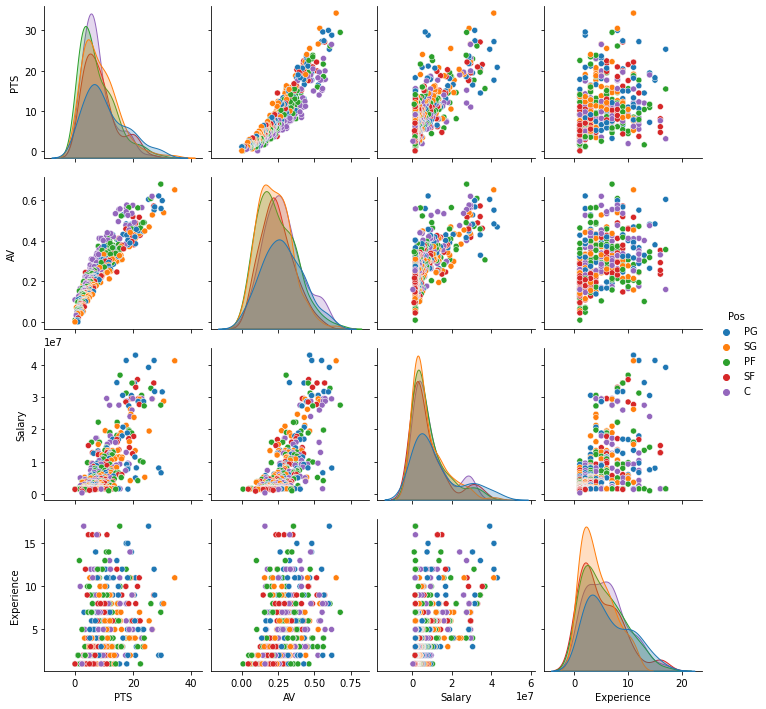

In [52]:
sns.pairplot(regular_season_20_cor1, hue = 'Pos')

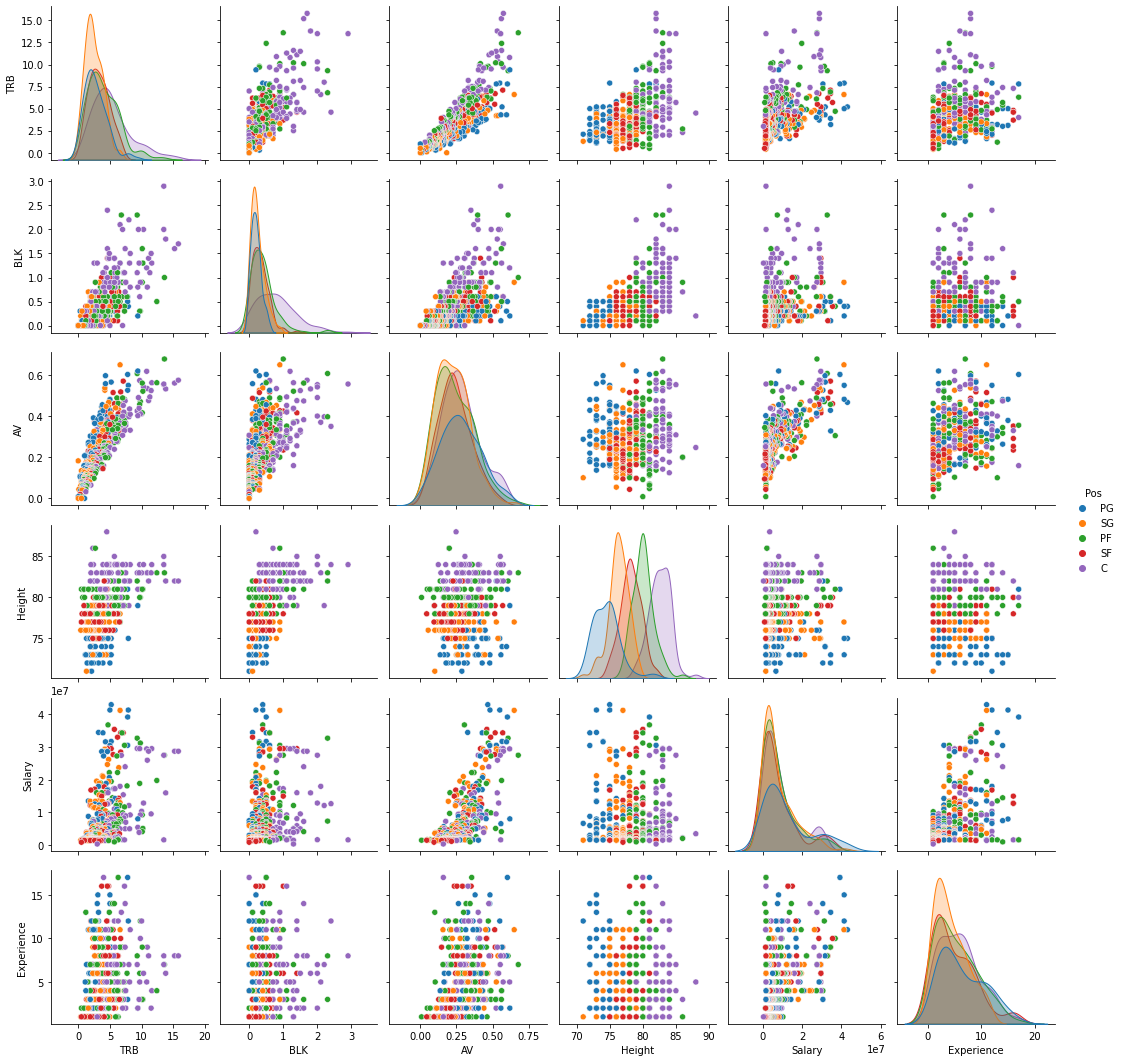

In [53]:
sns.pairplot(regular_season_20_cor2, hue = 'Pos')

In [54]:
overunder = regular_season_20[['Player', 'Pos', 'Tm', 'AV', 'Salary', 'Experience']]
overunder['AV_z'] = (overunder['AV'] - np.mean(overunder['AV']))/np.std(overunder['AV'])
overunder['Salary_z'] = (overunder['Salary'] - np.mean(overunder['Salary']))/np.std(overunder['Salary'])
overunder['z_difference'] = overunder['AV_z'] - overunder['Salary_z']
#overunder.sort_values('z_difference')
overunder[overunder['Experience'] >= 4.0].sort_values('z_difference', ascending = False).head(10).style.hide_index()
#overunder[overunder['Experience'] >= 4.0].sort_values('z_difference', ascending = False).head(10)
#overunder[(overunder['z_difference'] < 0.05) & (overunder['z_difference'] > -0.05)]

<ipython-input-54-1d151c64b789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overunder['AV_z'] = (overunder['AV'] - np.mean(overunder['AV']))/np.std(overunder['AV'])
<ipython-input-54-1d151c64b789>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overunder['Salary_z'] = (overunder['Salary'] - np.mean(overunder['Salary']))/np.std(overunder['Salary'])
<ipython-input-54-1d151c64b789>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Player,Pos,Tm,AV,Salary,Experience,AV_z,Salary_z,z_difference
Hassan Whiteside,C,POR,0.556180,1620564.000000,8.000000,2.376566,-0.757351,3.133917
Jusuf Nurkic,C,POR,0.541952,12888889.000000,6.000000,2.265698,0.425616,1.840082
Richaun Holmes,C,SAC,0.435067,5005350.000000,5.000000,1.432815,-0.402011,1.834826
Jeff Teague,PG,MIN,0.364765,1620564.000000,11.000000,0.885005,-0.757351,1.642356
Carmelo Anthony,PF,POR,0.355668,1620564.000000,17.000000,0.814121,-0.757351,1.571472
Paul Millsap,PF,DEN,0.344649,1000000.000000,14.000000,0.728252,-0.822499,1.550751
Marquese Chriss,PF,GSW,0.352008,1824003.000000,4.000000,0.785597,-0.735994,1.521591
Montrezl Harrell,C,LAC,0.452041,9258000.000000,5.000000,1.565085,0.044439,1.520645
Glenn Robinson III,SF,GSW,0.342801,1620564.000000,6.000000,0.713852,-0.757351,1.471203
Clint Capela,C,HOU,0.532397,16000000.000000,6.000000,2.191245,0.752225,1.439020


In [55]:
topx_df = pd.DataFrame(columns = {'Top N salaried players', '# in top N salary and AV', 'Proportion'})
for topx  in range(10,60,10):
    count = 0
    for player in overunder[:topx]['Player'].unique():
        if player in overunder.sort_values('AV', ascending = False)[:topx]['Player'].unique():
            count += 1
    row = [topx, count, count/topx]
    topx_series = pd.Series(row, index = topx_df.columns)
    topx_df = topx_df.append(topx_series, ignore_index = True)
topx_df['Top N salaried players'] = topx_df['Top N salaried players'].astype(int)
topx_df['# in top N salary and AV'] = topx_df['# in top N salary and AV'].astype(int)
topx_df['Proportion'] = round(topx_df['Proportion'], 2).astype('str')
topx_df.style.hide_index()

# in top N salary and AV,Top N salaried players,Proportion
10,3,0.3
20,7,0.35
30,14,0.47
40,23,0.57
50,31,0.62


In [56]:
# We will simply use their approximate value divided by their salary
regular_season_20['Cost_Effective'] = regular_season_20['AV']/regular_season_20['Salary']*1000000

# We only consider those who has an approximate value which is greater 0.1 to avoid outliers
regular_season_20_cor = regular_season_20[regular_season_20['AV'] > 0.1]

regular_season_20_cor.sort_values('Cost_Effective', ascending = False, inplace = True)
regular_season_20_cor_top = regular_season_20_cor.drop_duplicates('Player')
regular_season_20_cor_top = regular_season_20_cor_top[0:10]

<ipython-input-56-1989c70dcb86>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_season_20_cor.sort_values('Cost_Effective', ascending = False, inplace = True)


In [57]:
regular_season_20_cor_top = regular_season_20_cor_top.merge(teams, how = 'left', on='Tm')
regular_season_20_cor_top['PrimaryColor'] = '#' + regular_season_20_cor_top['PrimaryColor']
regular_season_20_cor_top['SecondaryColor'] = '#' + regular_season_20_cor_top['SecondaryColor']

In [58]:
#We only choose those whose Approximate value is greater than 0.3
chart_ce = alt.Chart(regular_season_20_cor_top).mark_bar(size = 20).encode(
    y=alt.Y('Player', sort = ['Cost_Effective'], title = None), 
    x = alt.X('Cost_Effective'), 
    color = alt.Color('PrimaryColor:N', scale = None)).properties(
    width = 300, height = 400, title = "Cost-Effective Rank Top 10")

chart_ce.configure_axis(
    grid=False
).configure_view(
    strokeOpacity=0
)

alt.Chart(...)

In [59]:
# Now we will aggregate the players by team to see which team has the highest score
regular_season_20_cor = regular_season_20_cor[regular_season_20_cor['Tm'] != 'TOT']
smt_team = regular_season_20_cor['Cost_Effective'].groupby(regular_season_20_cor['Tm']).mean()
smt_team = pd.DataFrame(data = smt_team.sort_values(ascending = False))
smt_team.reset_index(inplace = True)
smt_team = smt_team.merge(teams, how = 'left', on='Tm')
smt_team['PrimaryColor'] = '#' + smt_team['PrimaryColor']
smt_team['SecondaryColor'] = '#' + smt_team['SecondaryColor']

In [60]:
# Make a bar chart to rank the teams
# Using the team primary color as well
base = alt.Chart(smt_team).mark_bar(size = 15).encode(
    y=alt.Y('Tm', title = None, sort = ['Cost_Effective']), 
    x = 'Cost_Effective', 
    color = alt.Color('PrimaryColor', scale = None, title = 'Team')
).properties(
    width = 220, 
    height = 700,
    title = "Cost_effective Team Rank Top 10")

line = alt.Chart(smt_team).mark_rule(color = 'red').encode(x = 'mean(Cost_Effective):Q')


ce_tm = base + line

In [61]:
smt_team2 = regular_season_20_cor['AV'].groupby(regular_season_20_cor['Tm']).mean()
smt_team2 = pd.DataFrame(data = smt_team2.sort_values(ascending = False))
smt_team2.reset_index(inplace = True)
smt_team2 = smt_team2.merge(teams, how = 'left', on='Tm')
smt_team2['PrimaryColor'] = '#' + smt_team2['PrimaryColor']
smt_team2['SecondaryColor'] = '#' + smt_team2['SecondaryColor']

base = alt.Chart(smt_team2).mark_bar(size = 15).encode(
    y=alt.Y('Tm', title = None, sort = ['AV']), 
    x = 'AV', 
    color = alt.Color('PrimaryColor', scale = None, title = 'Team')
).properties(
    width = 220, 
    height = 700,
    title = "Approximate Value Team Rank Top 10")

line = alt.Chart(smt_team2).mark_rule(color = 'red').encode(x = 'mean(AV):Q')


av_tm = base + line

In [62]:
smt_team3 = regular_season_20_cor['TV'].groupby(regular_season_20_cor['Tm']).mean()
smt_team3 = pd.DataFrame(data = smt_team3.sort_values(ascending = False))
smt_team3.reset_index(inplace = True)
smt_team3 = smt_team3.merge(teams, how = 'left', on='Tm')
smt_team3['PrimaryColor'] = '#' + smt_team3['PrimaryColor']
smt_team3['SecondaryColor'] = '#' + smt_team3['SecondaryColor']

base = alt.Chart(smt_team3).mark_bar(size = 15).encode(y=alt.Y('Tm', title = None, sort = ['TV']), 
                                      x = 'TV', 
                                      color = alt.Color('PrimaryColor', scale = None, title = 'Team')).properties(
    width = 220, 
    height = 700,
    title = "Trade Value Team Rank Top 10")

line = alt.Chart(smt_team3).mark_rule(color = 'red').encode(x = 'mean(TV):Q')


tv_tm = base + line
(av_tm | tv_tm | ce_tm).configure_axis(
    grid=False
).configure_view(
    strokeOpacity=0
)

alt.HConcatChart(...)

### Question 4: How has the league-wide distribution of star players changed over the last decade?
#### We will provide a metric that helps to determine which players should be considered a star player and then partition them by teams. We would like to see whether the distribution of star players is more concentrated now than it was ten years ago.  By doing so, we will determine whether star players are more likely to team up.


In [63]:
#we consider those whose approximate value greater than 0.5 as Star Players
regular_2010 = regular_2010s[regular_2010s['Tm']!='TOT']

lst = []
lst2 = []
for i in range(2011,2021):
    season = regular_2010[regular_2010['Year'] == i]
    season = season.sort_values('AV', ascending=False)
    #print(season)
    #num = round((len(season)*(0.05)))
    #season = season[:num]
    season = season[season['AV'] > 0.5]
    tm = season['Player'].groupby(season['Tm']).count()
    a = len(tm.where(tm>=2).dropna())
    b = len(tm.where(tm>=3).dropna())
    lst.append(a)
    lst2.append(b)
str = pd.DataFrame(data = (lst,lst2)).T
str.columns = ['2 Star Players','3 Star Players']
str['Year'] = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
str.set_index('Year')

,2 Star Players,3 Star Players
Year,,
2011,2,0
2012,2,0
2013,0,0
2014,2,0
2015,2,2
2016,3,0
2017,3,1
2018,5,0
2019,7,0


In [64]:
for i in range(2011,2021):
    print(len(regular_2010[regular_2010['Year'] == i]))

542
515
523
548
575
528
542
605
622
591


In [65]:
# Plot the data into a line graph
data =str.reset_index().melt('Year')
data = data.iloc[10:]
one = alt.Chart(data).mark_line().encode(
    x = alt.X('Year', axis=alt.Axis(labelAngle=-45)),
    y =alt.Y('value', title = 'Number of Teams'),
    color = alt.Color('variable', title= 'Teams with')
    ).properties(
    height = 250,
    width = 500,
    title = "Teams With Multiple Players Where AV>0.5")

In [66]:
#we consider those whose approximate value is the top 5% as Star Players
lst = []
lst2 = []
for i in range(2011,2021):
    season = regular_2010[regular_2010['Year'] == i]
    season = season.sort_values('AV', ascending=False)
    #print(season)
    num = round((len(season)*(0.05)))
    season = season[:num]
    #season = season[season['AV'] > 1]
    tm = season['Player'].groupby(season['Tm']).count()
    a = len(tm.where(tm>=2).dropna())
    b = len(tm.where(tm>=3).dropna())
    lst.append(a)
    lst2.append(b)
str = pd.DataFrame(data = (lst,lst2)).T
str.columns = ['2 Star Players','3 Star Players']
str['Year'] = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
str.set_index('Year')

,2 Star Players,3 Star Players
Year,,
2011,7,2
2012,5,1
2013,8,0
2014,5,1
2015,10,2
2016,4,1
2017,5,2
2018,7,2
2019,8,1


In [67]:
# Plot the data into a line graph
data =str.reset_index().melt('Year')
data = data.iloc[10:]
two = alt.Chart(data).mark_line().encode(x = alt.X('Year', axis=alt.Axis(labelAngle=-45)), y =alt.Y('value', title = ''), color = alt.Color('variable', title= 'Teams with')
    ).properties(height = 250, width = 500, title = "Teams with Multiple Players in Top 5% AV")



In [68]:
alt.hconcat(one, two)

alt.HConcatChart(...)

Text(0.5, 1.0, 'Number of Players With AV>0.5')

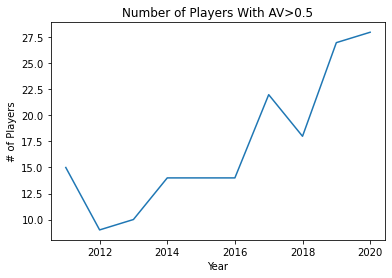

In [69]:
# As we can spot above, if we choose a certain value of Approximate Value, we got more teams have star players
# If we consider a top percentage of players as star players, the distribution of star players has NOT became more concentrated
# So we assume star players are playing smarter than the old days which they all get higher approximate value than before
# Let's calculate how many players' approximate value are higher than 1 during the past 10 years
lst = []
for i in range(2011,2021):
    season = regular_2010[regular_2010['Year'] == i]
    season = season[season['AV'] > 0.5]
    lst.append(len(season))

plt.plot(range(2011,2021), lst)
plt.xlabel('Year')
plt.ylabel('# of Players')
plt.title('Number of Players With AV>0.5')

In [70]:
# In another way, for those players who is atop 5% in the league, how much is their mean approximate value
lst1 = []
lst2 = []
lst3 = []
lst4 = []
for i in range(2011,2021):
    season = regular_2010[regular_2010['Year'] == i]
    season = season.sort_values('AV', ascending=False)
    num1 = round((len(season)*(0.05)))
    num2 = round((len(season)*(0.2)))
    num3 = round((len(season)*(0.5)))
    num4 = round((len(season)*(1)))
    season1 = season[:num1]
    season2 = season[:num2]
    season3 = season[:num3]
    season4 = season[:num4]
    lst1.append(season1['AV'].mean())
    lst2.append(season2['AV'].mean())
    lst3.append(season3['AV'].mean())
    lst4.append(season4['AV'].mean())
lst = lst1,lst2,lst3,lst4

In [71]:
df = pd.DataFrame(data = lst).T
df.columns = ['top5%','top20%','top50%','Whole League']
df['Year'] = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
df.set_index('Year', inplace = True)
data =df.reset_index().melt('Year')


In [72]:
base = alt.Chart(data).mark_line().encode(x = alt.X('Year',title = None, axis=alt.Axis(labelAngle=0)),
                                       y = alt.Y('value', scale = alt.Scale(domain =[0.2,0.6]),title = 'Approximate Value'),color = alt.Color('variable', legend = None)).properties(width = 300, height = 400, title = 'AV by Various Segments of Players')

annotations = [['2013', 0.53, 'Top 5%'],
              ['2013', 0.45, 'Top 20%'],
              ['2013', 0.35, 'Top 50%'],
              ['2013', 0.26, 'Whole League']]
c_df = pd.DataFrame(annotations, columns=['AV','salary','note'])
annotation = alt.Chart(c_df).mark_text(align = 'center', baseline = 'middle', dx=7, lineBreak = '\n', style ='bond', fontSize=20).encode(x='AV', y='salary', text='note')

In [73]:
df

,top5%,top20%,top50%,Whole League
Year,,,,
2011,0.505435,0.422693,0.334992,0.234260
2012,0.489836,0.409930,0.326708,0.234866
2013,0.498610,0.418060,0.329371,0.231698
2014,0.513270,0.419430,0.332635,0.231189
2015,0.499126,0.410316,0.329440,0.234149
2016,0.518019,0.421648,0.336104,0.240764
2017,0.550759,0.437612,0.343079,0.245372
2018,0.534946,0.425121,0.337374,0.237599
2019,0.556365,0.448689,0.352142,0.250057


In [74]:
bar_lst = []
for i in df.columns:
    a = round((df['{}'.format(i)].max() - df['{}'.format(i)].min())/df['{}'.format(i)].min(),3)*100
    bar_lst.append(a)
df_bar = pd.DataFrame(data = bar_lst, columns = ['AV'])
df_bar['Categories'] = df.columns
df_bar

,AV,Categories
0,14.4,top5%
1,10.1,top20%
2,9.1,top50%
3,9.7,Whole League


In [75]:
bar = alt.Chart(df_bar).mark_bar(size = 30).encode(x = alt.X('AV', title = None), y = alt.Y('Categories',axis=alt.Axis(labels=False), title = None, sort = ['AV']), color = alt.Color('Categories', legend = None)).properties(title = 'Percent Increase',width = 300, height = 400)

text = bar.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='AV'
)

bar+text

alt.LayerChart(...)

In [76]:
((base + annotation) | (bar + text)).configure_axis(
    grid=False
).configure_view(
    strokeOpacity=0
).properties(title = {'text':['Player Improvement'],'subtitle':["Top tier players see more improvement than the rest",''],'subtitleFontSize': 16,'fontSize': 20,'anchor':'start'})

alt.HConcatChart(...)

In [77]:
# We can conclude star players are more efficient in nowadays than before, which get higher approximate value than before